# Government720 Initial Data Analysis
This notebook is for looking at the time series of the numerical variables to determine interpolation and extrapolation methods.

### CLIENT 1: ECONOMY

In [53]:
# Import pandas
import pandas as pd

# Access Google Drive for Excel file
from google.colab import drive
drive.mount('/content/drive')

# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT1_ECONOMY', engine='openpyxl')

# Display the first few rows
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              DATE  UNEMPLOYMENT_RATE  INFLATION_RATE   GDP  HOUSING_AFFORD  \
0  Week-1-Jan-2000                NaN             2.7  10.0             NaN   
1  Week-2-Jan-2000                NaN             NaN   NaN             NaN   
2  Week-3-Jan-2000                NaN             NaN   NaN             NaN   
3  Week-4-Jan-2000                NaN             NaN   NaN             NaN   
4  Week-1-Feb-2000                NaN             3.2   NaN             NaN   

   MIN_WAGE  POVERTY_WAGE  GENDER_GAP  RACIAL_GAP  DEFICIT  ...  PAYROLL_TAX  \
0      5.15           8.4        22.7        19.2      NaN  ...         3.93   
1       NaN           NaN         NaN         NaN      NaN  ...          NaN   
2       NaN           NaN         NaN         NaN      NaN  ...          NaN   
3       NaN           NaN         NaN         NaN      NaN  ...          NaN

In [54]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  UNEMPLOYMENT_RATE  INFLATION_RATE   GDP  HOUSING_AFFORD  \
0 2000-01-01                NaN             2.7  10.0             NaN   
1 2000-01-02                NaN             NaN   NaN             NaN   
2 2000-01-03                NaN             NaN   NaN             NaN   
3 2000-01-04                NaN             NaN   NaN             NaN   
4 2000-02-01                NaN             3.2   NaN             NaN   

   MIN_WAGE  POVERTY_WAGE  GENDER_GAP  RACIAL_GAP  DEFICIT  ...  PAYROLL_TAX  \
0      5.15           8.4        22.7        19.2      NaN  ...         3.93   
1       NaN           NaN         NaN         NaN      NaN  ...          NaN   
2       NaN           NaN         NaN         NaN      NaN  ...          NaN   
3       NaN           NaN         NaN         NaN      NaN  ...          NaN   
4       NaN           NaN         NaN         NaN      NaN  ...          NaN   

   CORPORATE_TAX  CORPORATE_PROFIT  TOP1_WEALTH  FICO_SCORE  \
0           1.24 

In [58]:
# Display data types of all columns in the DataFrame
print(df.dtypes)

# Convert 'TOP1_WEALTH' column from object to float64
df['CORPORATE_PROFIT'] = pd.to_numeric(df['CORPORATE_PROFIT'], errors='coerce')

# Verify the change
print(df['CORPORATE_PROFIT'].dtype)

DATE                     datetime64[ns]
UNEMPLOYMENT_RATE               float64
INFLATION_RATE                  float64
GDP                             float64
HOUSING_AFFORD                  float64
MIN_WAGE                        float64
POVERTY_WAGE                    float64
GENDER_GAP                      float64
RACIAL_GAP                      float64
DEFICIT                         float64
SS_RECIPIENTS                   float64
CPI                             float64
MEDIAN_WAGE                     float64
MANU_JOBS                       float64
UNION_MEMBERS                   float64
JOBS_ADDED                      float64
POVERTY_RATE                    float64
FED_EMPLOY                      float64
GAO_HIGH_RISK                   float64
INCOME_TAX                      float64
PAYROLL_TAX                     float64
CORPORATE_TAX                   float64
CORPORATE_PROFIT                 object
TOP1_WEALTH                     float64
FICO_SCORE                      float64


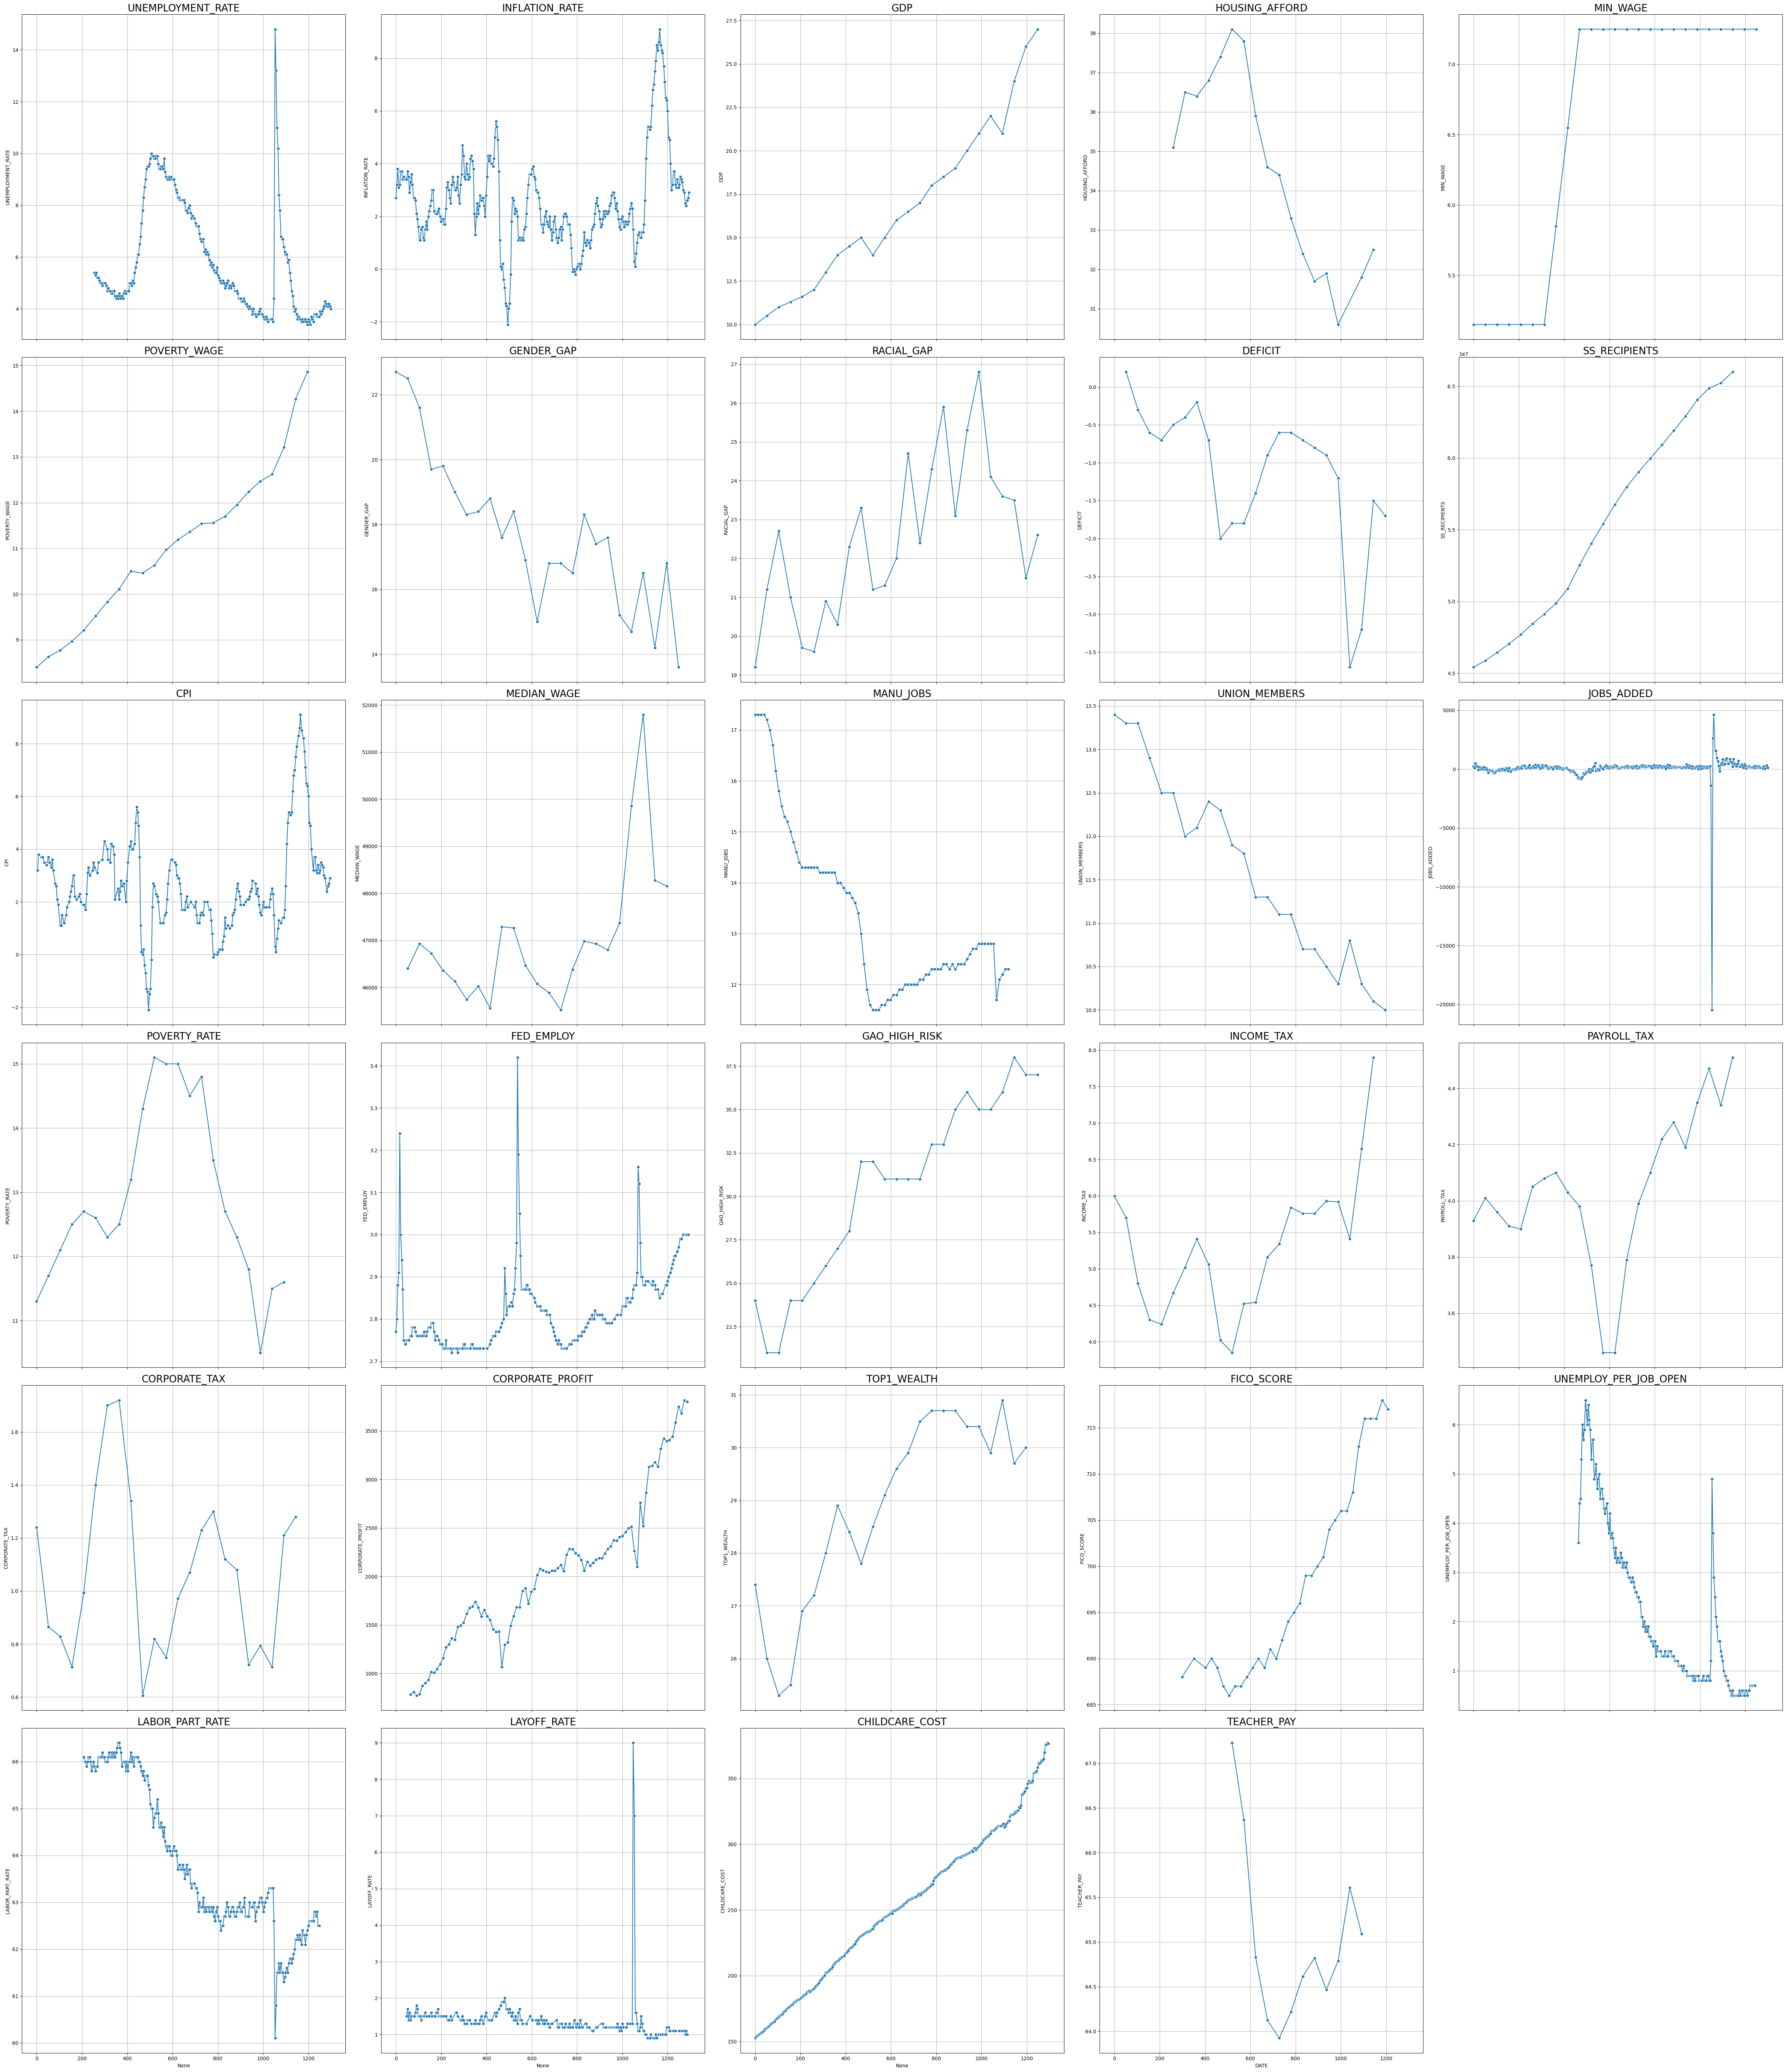

In [59]:
# Make multi-graph chart of numeric time series variables
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 2*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 2: MEDIA

In [11]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT2_MEDIA', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  MEDIA_TRUST  FACEBOOK_USE  INSTAGRAM_USE  TWITTER_USE  \
0  Week-1-Jan-2000         55.0           NaN            NaN          NaN   
1  Week-2-Jan-2000          NaN           NaN            NaN          NaN   
2  Week-3-Jan-2000          NaN           NaN            NaN          NaN   
3  Week-4-Jan-2000          NaN           NaN            NaN          NaN   
4  Week-1-Feb-2000          NaN           NaN            NaN          NaN   

   FACT_CHECKERS  MISINFORMATION_MENTIONS  
0            NaN                      NaN  
1            NaN                      NaN  
2            NaN                      NaN  
3            NaN                      NaN  
4            NaN                      NaN  


In [12]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  MEDIA_TRUST  FACEBOOK_USE  INSTAGRAM_USE  TWITTER_USE  \
0 2000-01-01         55.0           NaN            NaN          NaN   
1 2000-01-02          NaN           NaN            NaN          NaN   
2 2000-01-03          NaN           NaN            NaN          NaN   
3 2000-01-04          NaN           NaN            NaN          NaN   
4 2000-02-01          NaN           NaN            NaN          NaN   

   FACT_CHECKERS  MISINFORMATION_MENTIONS  
0            NaN                      NaN  
1            NaN                      NaN  
2            NaN                      NaN  
3            NaN                      NaN  
4            NaN                      NaN  


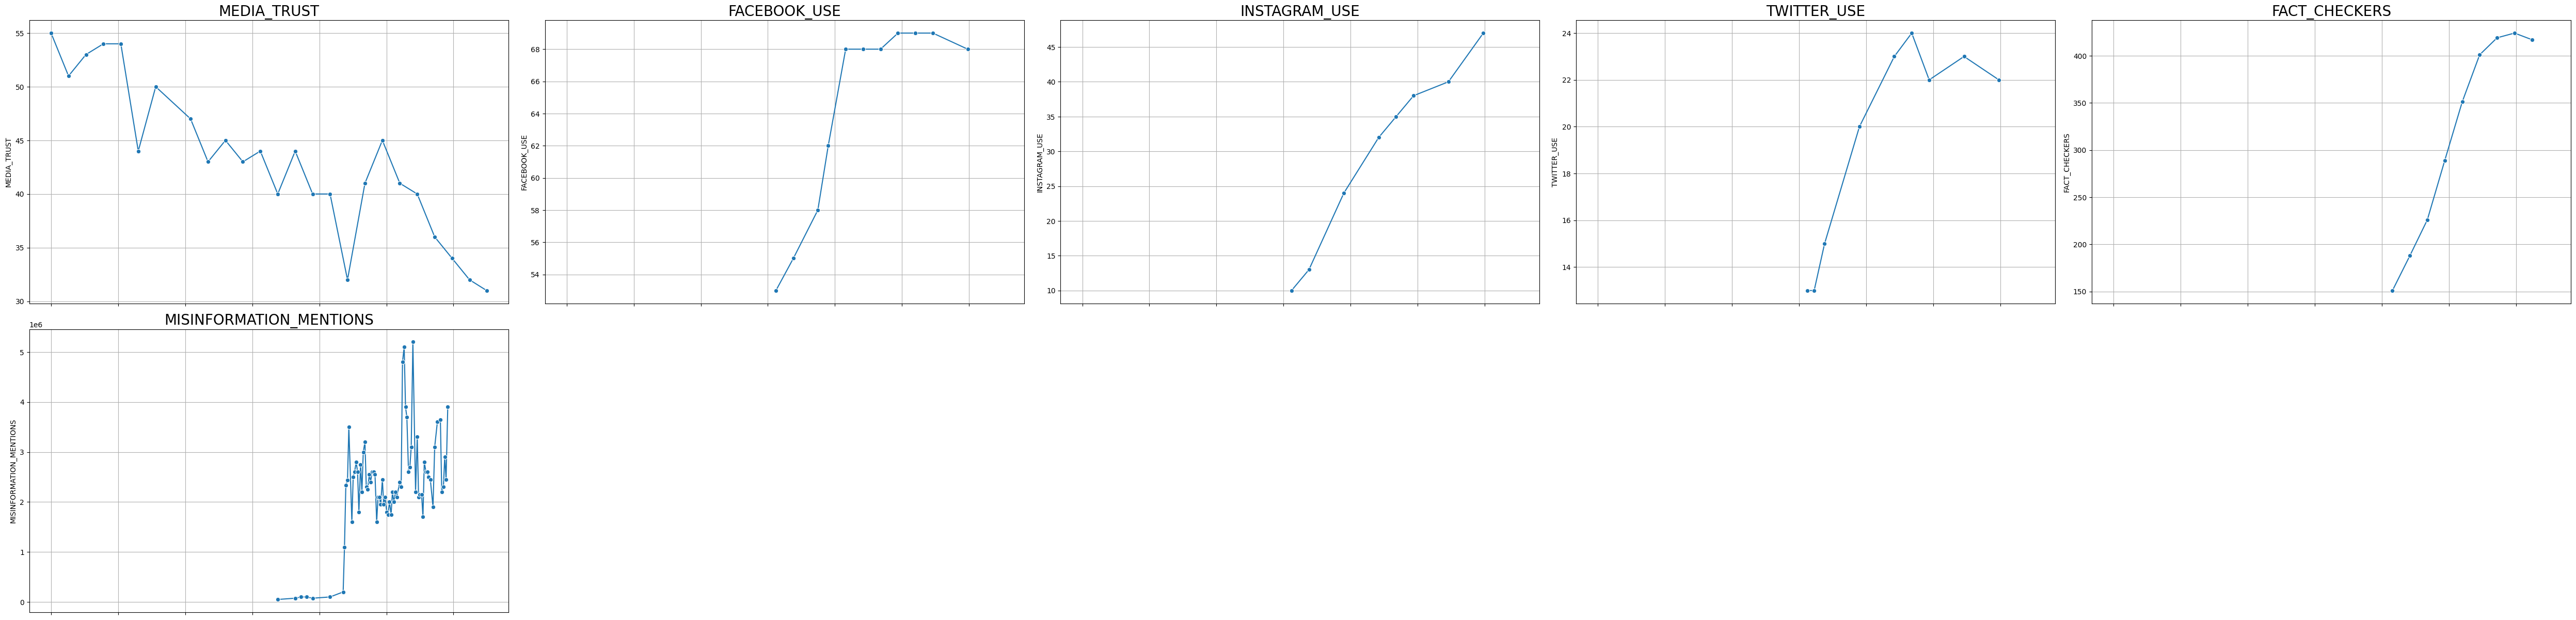

In [15]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 6*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 3: HEALTH

In [16]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT3_HEALTH', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  GUN_DEATH_RATE  OVERDOSE_DEATH_RATE  HEALTH_INSURANCE  \
0  Week-1-Jan-2000            10.3                  6.1              86.9   
1  Week-2-Jan-2000             NaN                  NaN               NaN   
2  Week-3-Jan-2000             NaN                  NaN               NaN   
3  Week-4-Jan-2000             NaN                  NaN               NaN   
4  Week-1-Feb-2000             NaN                  NaN               NaN   

   SUICIDE  OBESITY_RATE  ABORTIONS  MENTAL_ILLNESS_RATE  OPIOID_DEATHS  \
0     10.4           NaN        NaN                  NaN         8407.0   
1      NaN           NaN        NaN                  NaN            NaN   
2      NaN           NaN        NaN                  NaN            NaN   
3      NaN           NaN        NaN                  NaN            NaN   
4      NaN           NaN        NaN                  NaN            NaN   

   OPIOID_PRESCRIP  ...  ALCOHOL_TREATMENT  OPIOID_TREATMENT  IVF_BABIES  \
0         

In [17]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  GUN_DEATH_RATE  OVERDOSE_DEATH_RATE  HEALTH_INSURANCE  SUICIDE  \
0 2000-01-01            10.3                  6.1              86.9     10.4   
1 2000-01-02             NaN                  NaN               NaN      NaN   
2 2000-01-03             NaN                  NaN               NaN      NaN   
3 2000-01-04             NaN                  NaN               NaN      NaN   
4 2000-02-01             NaN                  NaN               NaN      NaN   

   OBESITY_RATE  ABORTIONS  MENTAL_ILLNESS_RATE  OPIOID_DEATHS  \
0           NaN        NaN                  NaN         8407.0   
1           NaN        NaN                  NaN            NaN   
2           NaN        NaN                  NaN            NaN   
3           NaN        NaN                  NaN            NaN   
4           NaN        NaN                  NaN            NaN   

   OPIOID_PRESCRIP  ...  ALCOHOL_TREATMENT  OPIOID_TREATMENT  IVF_BABIES  \
0              NaN  ...                NaN    

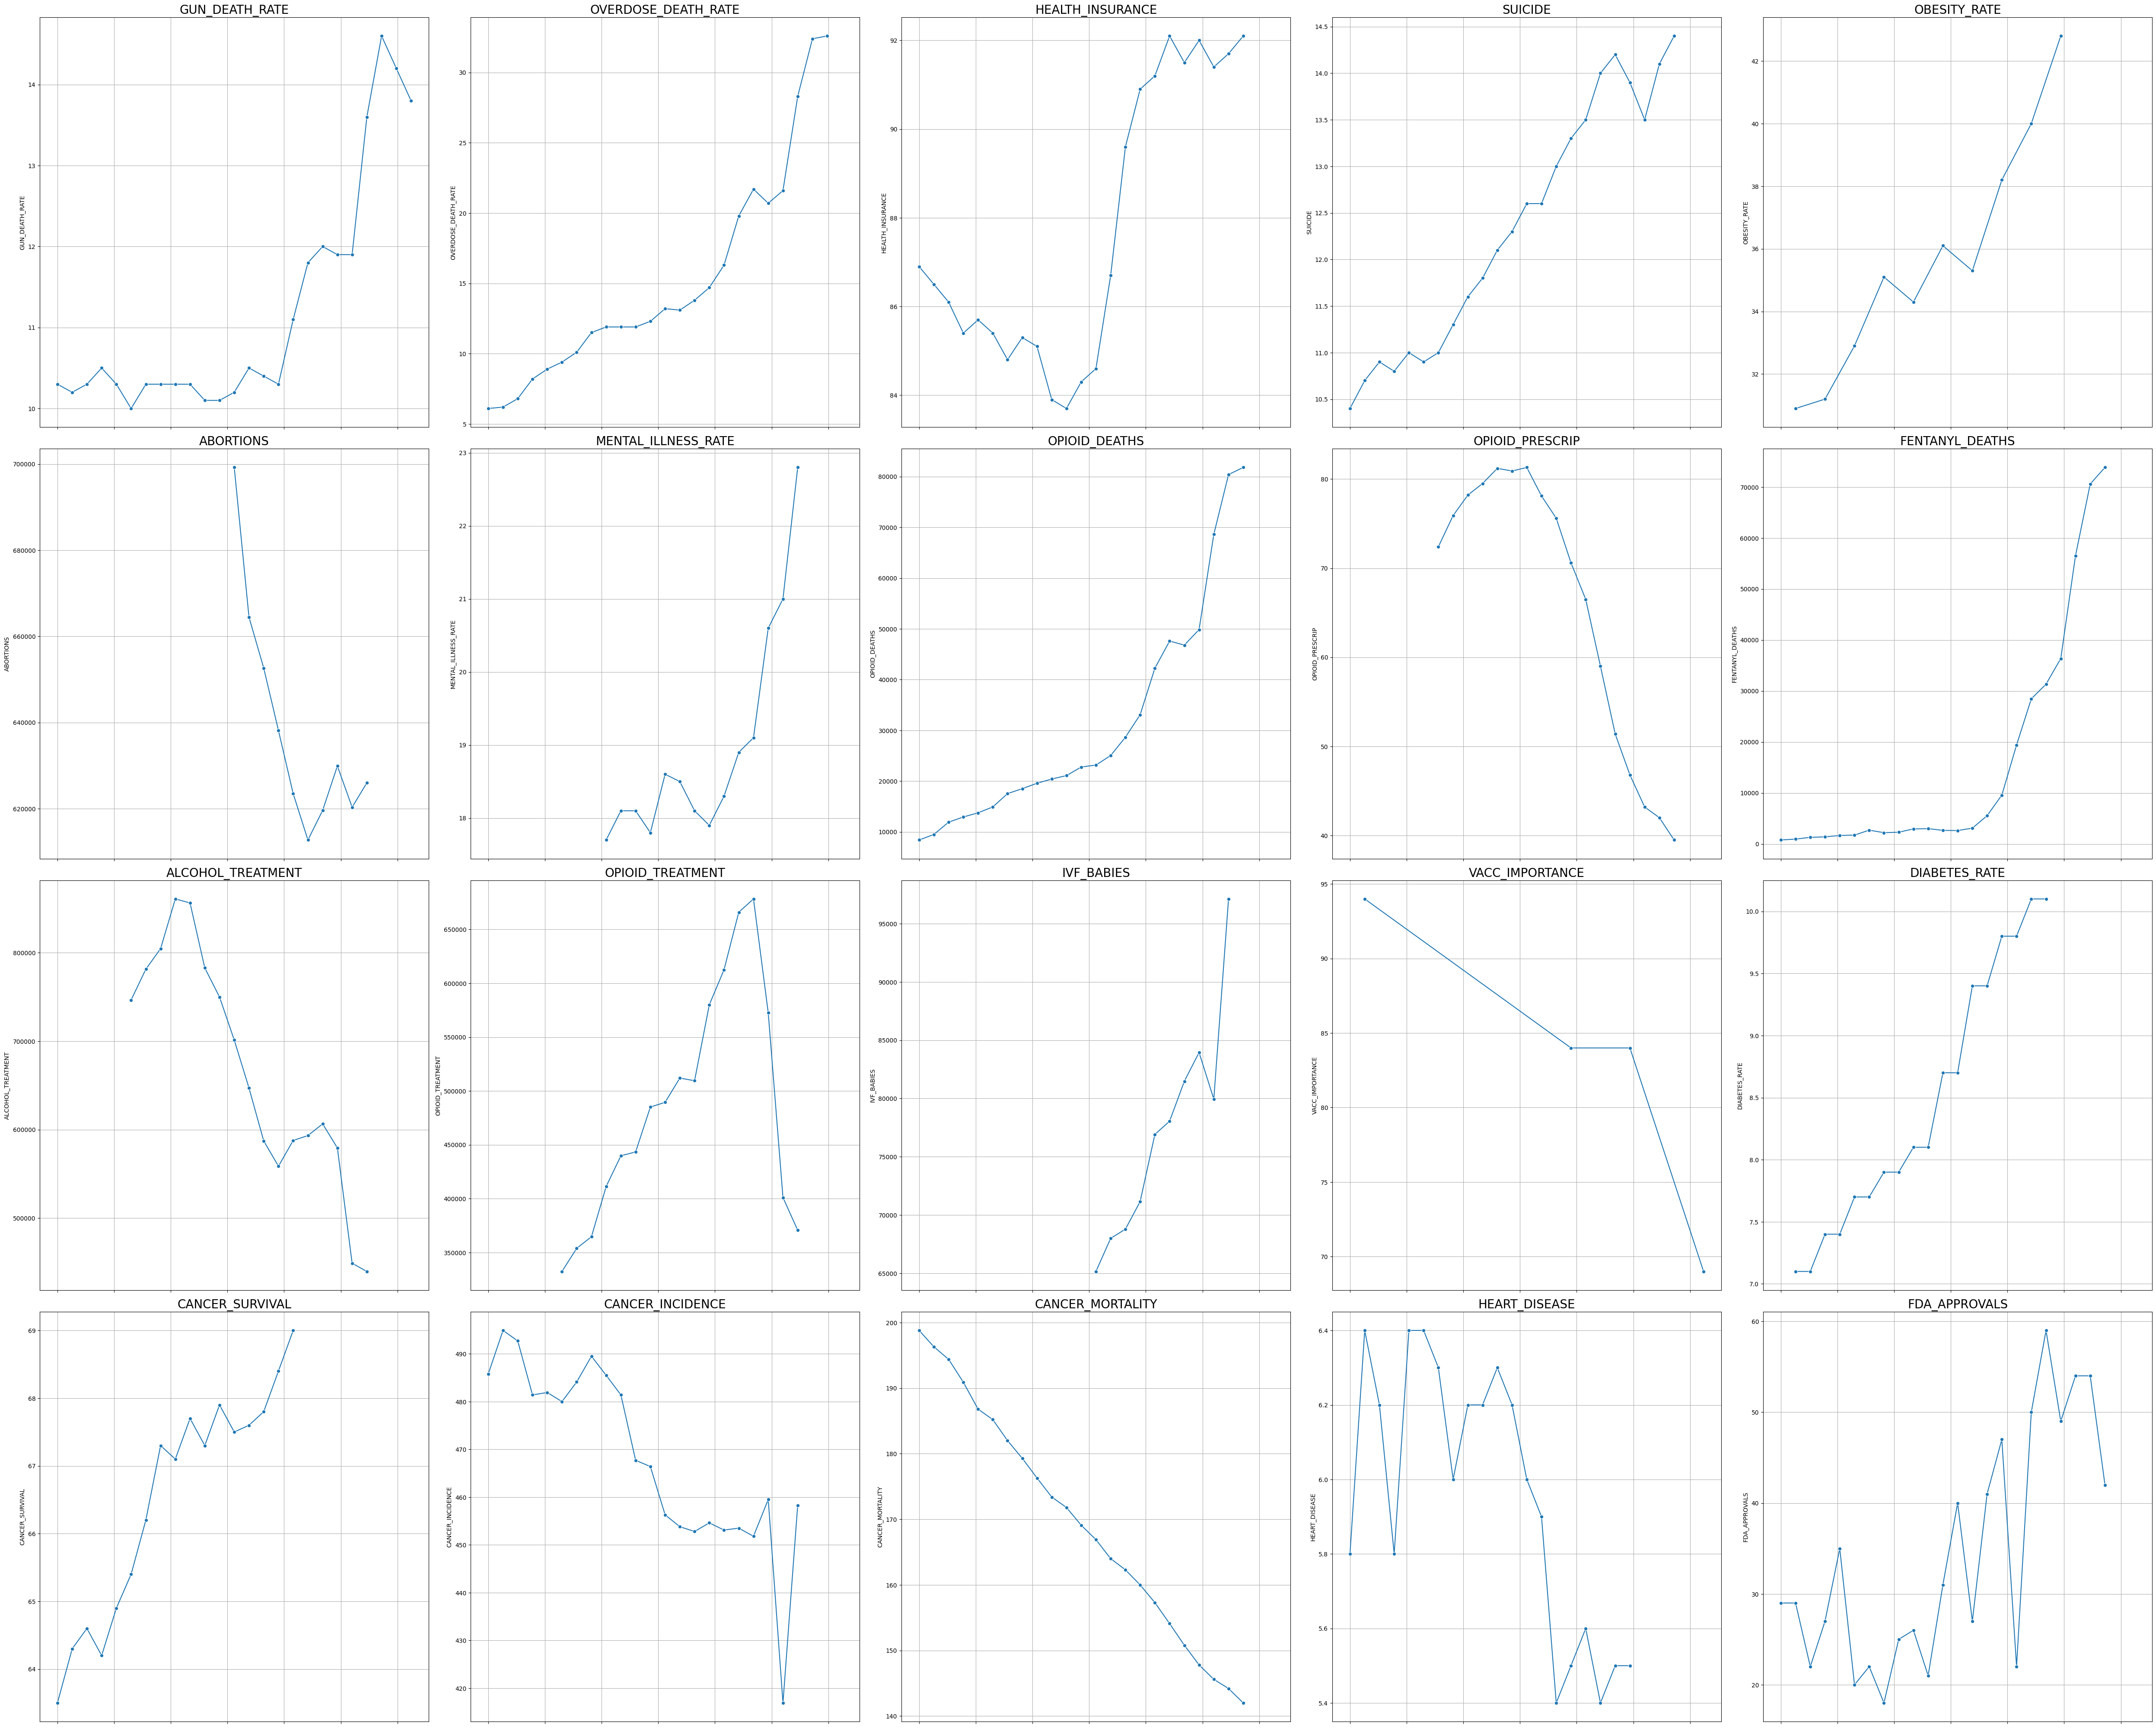

In [20]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 3*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 4: ELECTIONS

In [21]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT4_ELECTIONS', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  DARK_MONEY  VOTER_TURNOUT  SUPREME_COURT_APPROVAL  \
0  Week-1-Jan-2000       11.21           53.0                     NaN   
1  Week-2-Jan-2000         NaN            NaN                     NaN   
2  Week-3-Jan-2000         NaN            NaN                     NaN   
3  Week-4-Jan-2000         NaN            NaN                     NaN   
4  Week-1-Feb-2000         NaN            NaN                     NaN   

   CLOTURE_MOTIONS  ENACTED_LEGIS  OFFICIAL_THREATS  PARTISAN_GAP_HOUSE  \
0              NaN            NaN               NaN                 NaN   
1              NaN            NaN               NaN                 NaN   
2              NaN            NaN               NaN                 NaN   
3              NaN            NaN               NaN                 NaN   
4              NaN            NaN               NaN                 NaN   

   PARTISAN_GAP_SENATE  HOUSE_LEANING  SENATE_LEANING  
0                  NaN            NaN             NaN 

In [22]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  DARK_MONEY  VOTER_TURNOUT  SUPREME_COURT_APPROVAL  \
0 2000-01-01       11.21           53.0                     NaN   
1 2000-01-02         NaN            NaN                     NaN   
2 2000-01-03         NaN            NaN                     NaN   
3 2000-01-04         NaN            NaN                     NaN   
4 2000-02-01         NaN            NaN                     NaN   

   CLOTURE_MOTIONS  ENACTED_LEGIS  OFFICIAL_THREATS  PARTISAN_GAP_HOUSE  \
0              NaN            NaN               NaN                 NaN   
1              NaN            NaN               NaN                 NaN   
2              NaN            NaN               NaN                 NaN   
3              NaN            NaN               NaN                 NaN   
4              NaN            NaN               NaN                 NaN   

   PARTISAN_GAP_SENATE  HOUSE_LEANING  SENATE_LEANING  
0                  NaN            NaN             NaN  
1                  NaN            

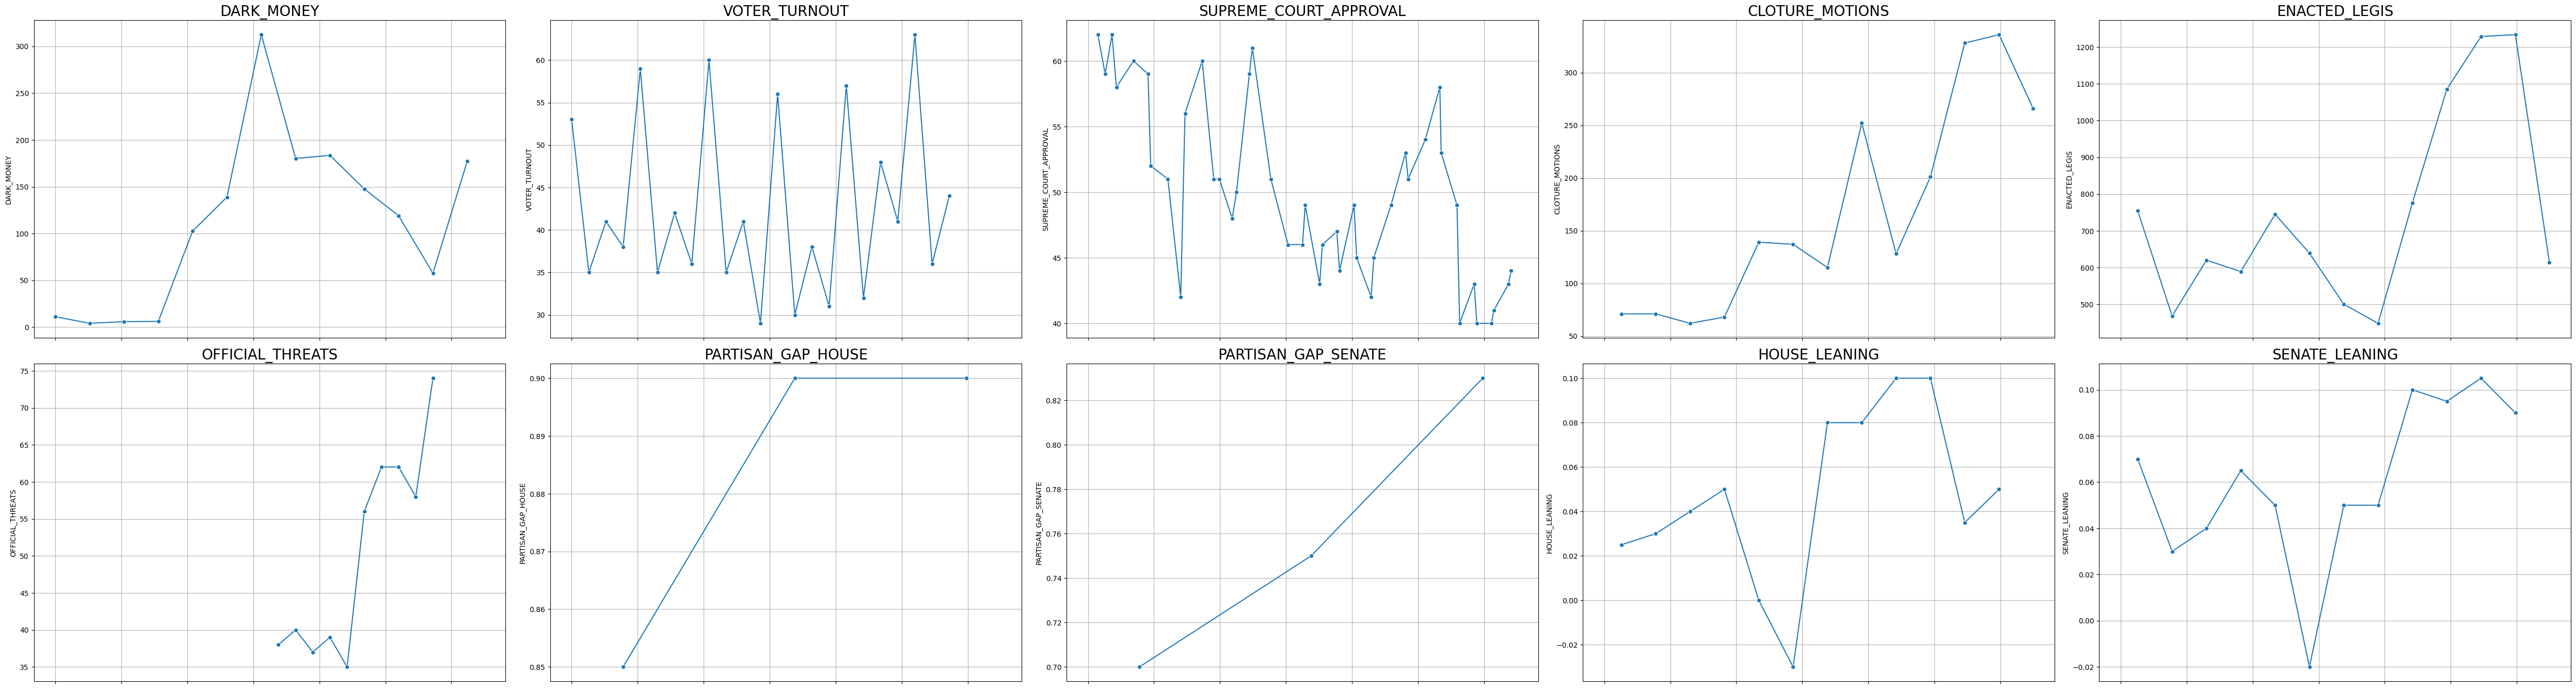

In [24]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 4*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 5: EDUCATION

In [25]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT5_EDUCATION', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  PUBLIC_TUITION  PRIVATE_TUITION  COLLEGE_ENROLL  \
0  Week-1-Jan-2000          3349.0          14616.0      15312289.0   
1  Week-2-Jan-2000             NaN              NaN             NaN   
2  Week-3-Jan-2000             NaN              NaN             NaN   
3  Week-4-Jan-2000             NaN              NaN             NaN   
4  Week-1-Feb-2000             NaN              NaN             NaN   

   LOAN_DEBT  READING_PROF  MATH_PROF  
0        NaN          32.5       26.0  
1        NaN           NaN        NaN  
2        NaN           NaN        NaN  
3        NaN           NaN        NaN  
4        NaN           NaN        NaN  


In [26]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  PUBLIC_TUITION  PRIVATE_TUITION  COLLEGE_ENROLL  LOAN_DEBT  \
0 2000-01-01          3349.0          14616.0      15312289.0        NaN   
1 2000-01-02             NaN              NaN             NaN        NaN   
2 2000-01-03             NaN              NaN             NaN        NaN   
3 2000-01-04             NaN              NaN             NaN        NaN   
4 2000-02-01             NaN              NaN             NaN        NaN   

   READING_PROF  MATH_PROF  
0          32.5       26.0  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  


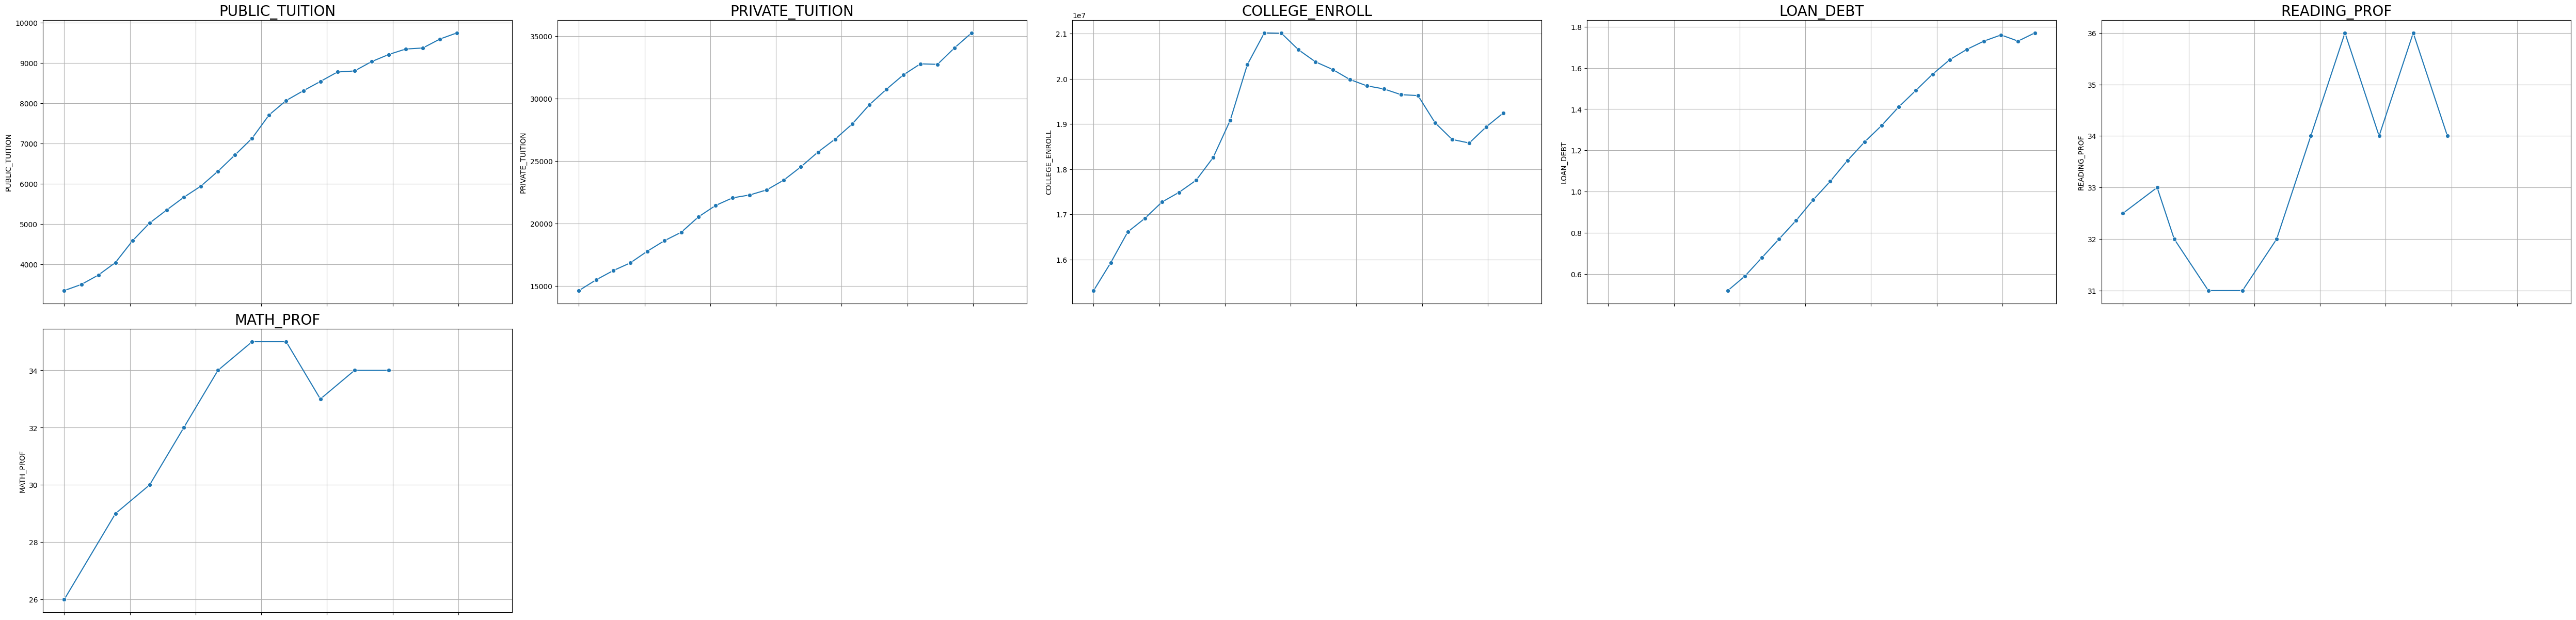

In [29]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 6*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 6: ENVIRONMENT

In [30]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT6_ENVIRONMENT', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  OIL_PROD  NATGAS_PROD  RENEW_PROD  PETROL_CONSUMP  \
0  Week-1-Jan-2000     12.45        19.34         4.2           37.73   
1  Week-2-Jan-2000       NaN          NaN         NaN             NaN   
2  Week-3-Jan-2000       NaN          NaN         NaN             NaN   
3  Week-4-Jan-2000       NaN          NaN         NaN             NaN   
4  Week-1-Feb-2000       NaN          NaN         NaN             NaN   

   NATGAS_CONSUMP  RENEW_CONSUMP  EMISSIONS  HYBRID_VEHICLES  \
0           22.91            4.2       7.37           9350.0   
1             NaN            NaN        NaN              NaN   
2             NaN            NaN        NaN              NaN   
3             NaN            NaN        NaN              NaN   
4             NaN            NaN        NaN              NaN   

   ELECTRIC_VEHICLES  FEMA_SPENDING  NATURAL_DISASTERS  SURFACE_TEMP  
0                0.0         0.8607                5.0          1.86  
1                NaN            Na

In [31]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  OIL_PROD  NATGAS_PROD  RENEW_PROD  PETROL_CONSUMP  \
0 2000-01-01     12.45        19.34         4.2           37.73   
1 2000-01-02       NaN          NaN         NaN             NaN   
2 2000-01-03       NaN          NaN         NaN             NaN   
3 2000-01-04       NaN          NaN         NaN             NaN   
4 2000-02-01       NaN          NaN         NaN             NaN   

   NATGAS_CONSUMP  RENEW_CONSUMP  EMISSIONS  HYBRID_VEHICLES  \
0           22.91            4.2       7.37           9350.0   
1             NaN            NaN        NaN              NaN   
2             NaN            NaN        NaN              NaN   
3             NaN            NaN        NaN              NaN   
4             NaN            NaN        NaN              NaN   

   ELECTRIC_VEHICLES  FEMA_SPENDING  NATURAL_DISASTERS  SURFACE_TEMP  
0                0.0         0.8607                5.0          1.86  
1                NaN            NaN                NaN           NaN  

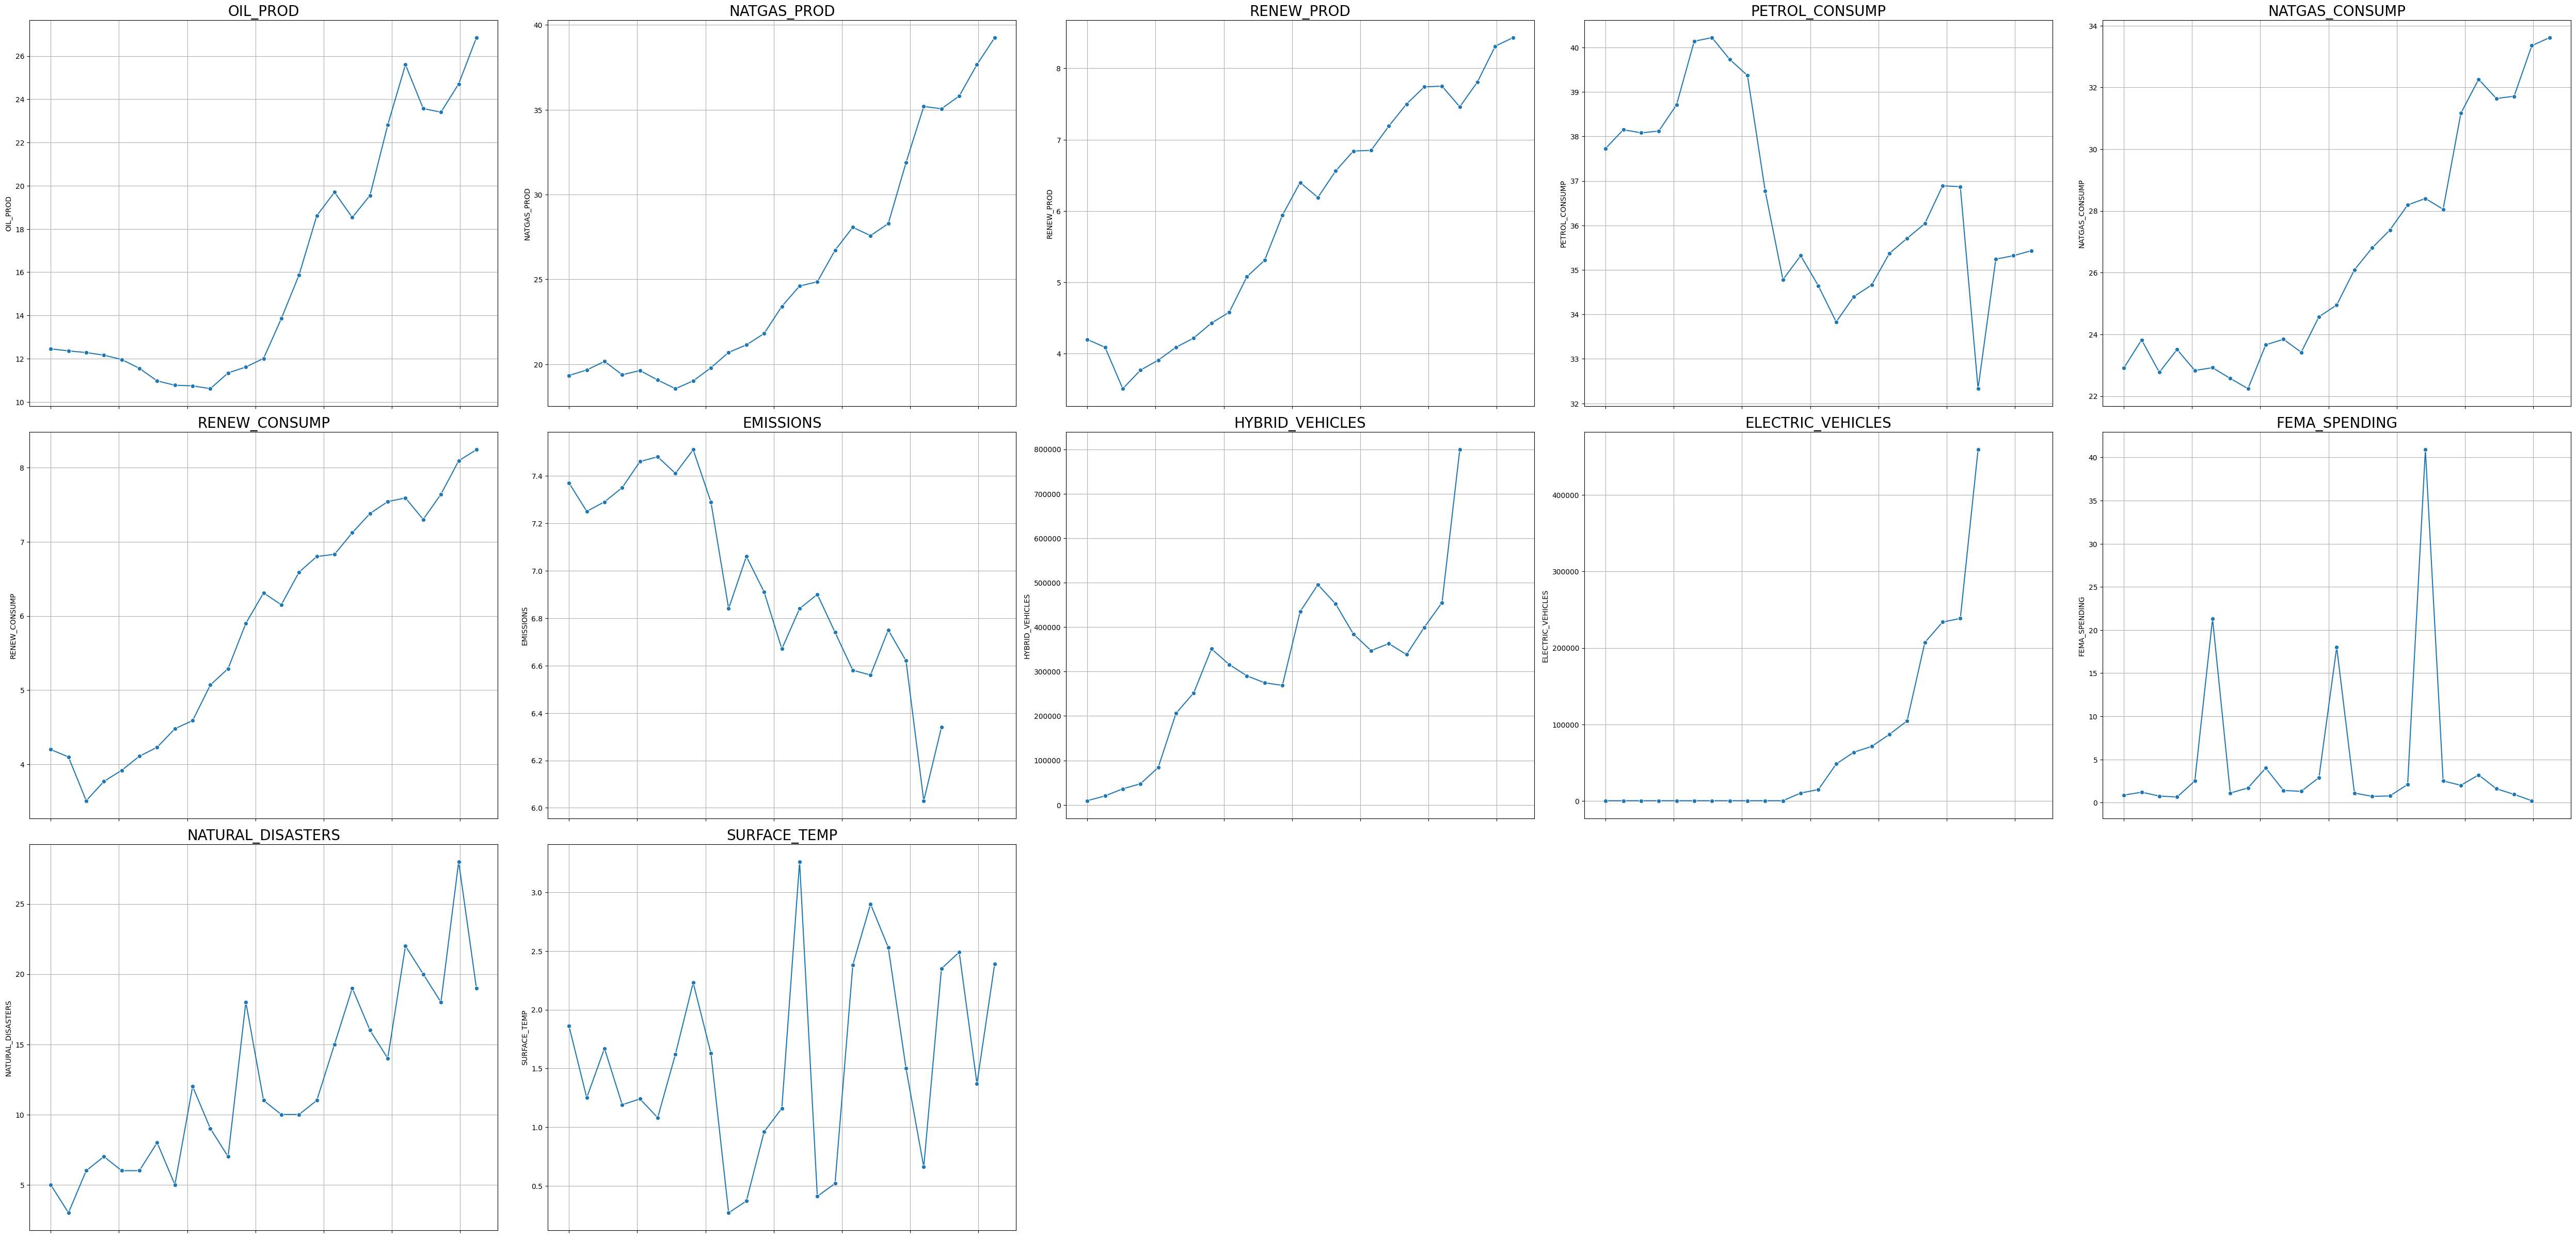

In [32]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 4*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 7: IMMIGRATION

In [33]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT7_IMMIGRATION', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  BORDER_ENCOUNTERS  IMMIGRANT_POP  UNDOCUMENTED_POP  \
0  Week-1-Jan-2000                NaN     31107889.0         8460000.0   
1  Week-2-Jan-2000                NaN            NaN               NaN   
2  Week-3-Jan-2000                NaN            NaN               NaN   
3  Week-4-Jan-2000                NaN            NaN               NaN   
4  Week-1-Feb-2000                NaN            NaN               NaN   

   BORDER_SPENDING  DEPORTATIONS  ASYLUM_APPS  
0              6.9           NaN          NaN  
1              NaN           NaN          NaN  
2              NaN           NaN          NaN  
3              NaN           NaN          NaN  
4              NaN           NaN          NaN  


In [34]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  BORDER_ENCOUNTERS  IMMIGRANT_POP  UNDOCUMENTED_POP  \
0 2000-01-01                NaN     31107889.0         8460000.0   
1 2000-01-02                NaN            NaN               NaN   
2 2000-01-03                NaN            NaN               NaN   
3 2000-01-04                NaN            NaN               NaN   
4 2000-02-01                NaN            NaN               NaN   

   BORDER_SPENDING  DEPORTATIONS  ASYLUM_APPS  
0              6.9           NaN          NaN  
1              NaN           NaN          NaN  
2              NaN           NaN          NaN  
3              NaN           NaN          NaN  
4              NaN           NaN          NaN  


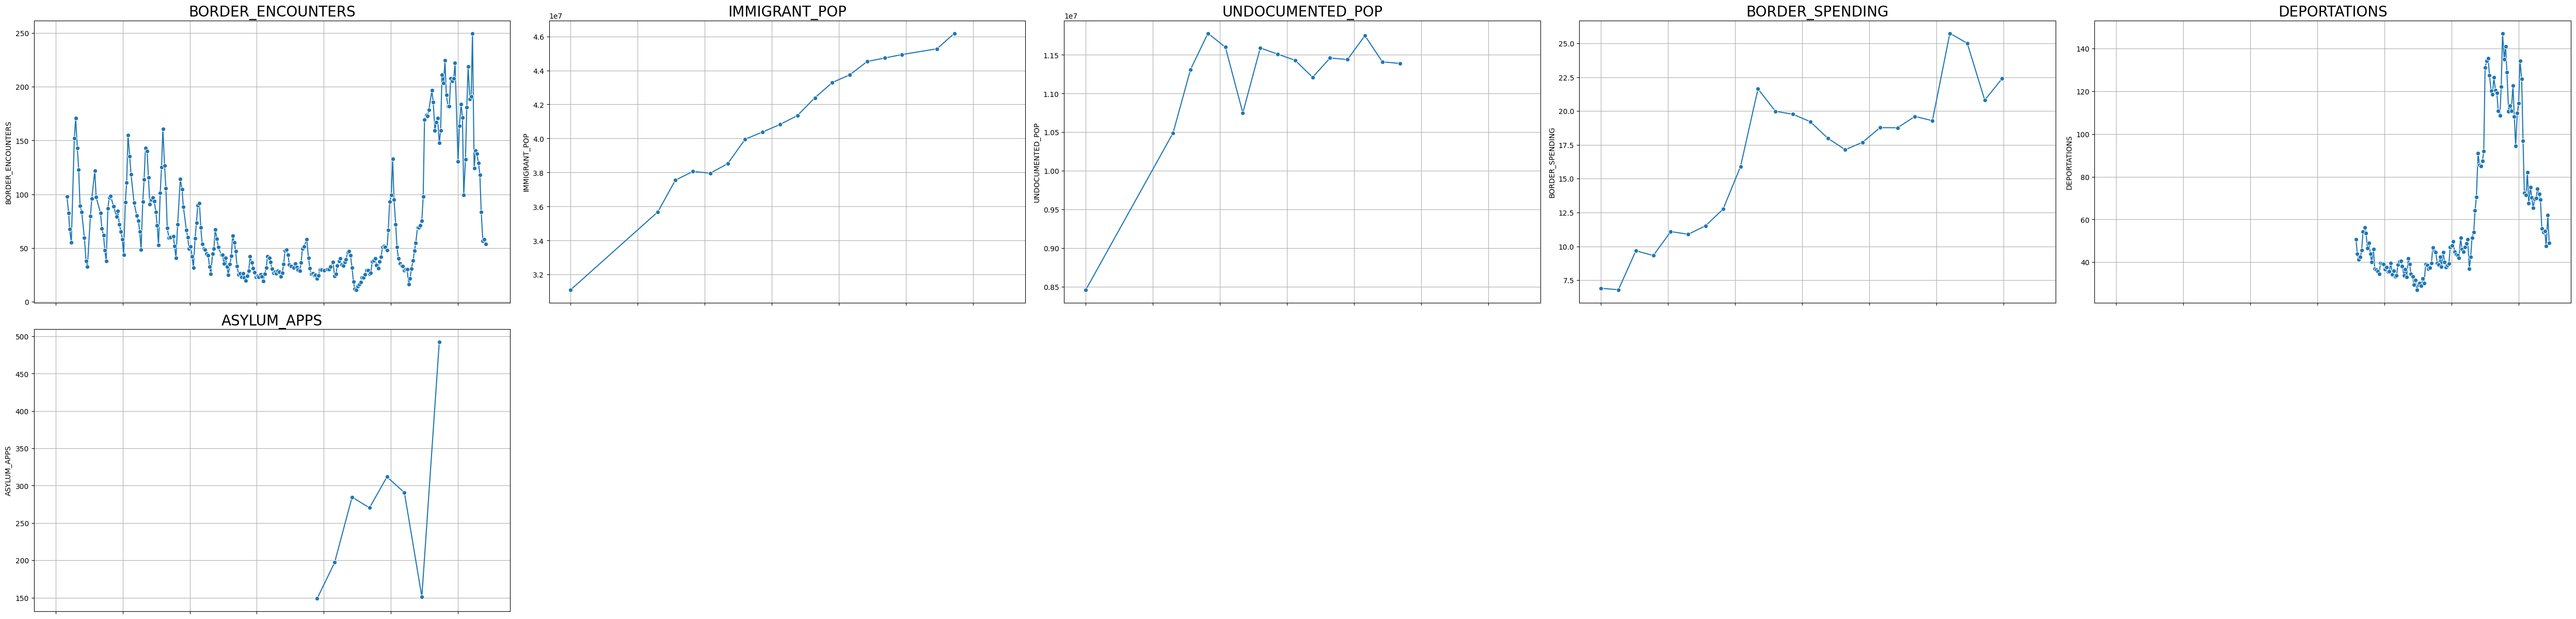

In [35]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 6*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 8: POPULATION

In [36]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT8_POPULATION', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  LGBTQ_IDENTITY  HOMELESS_POP  FERTILITY_RATE  \
0  Week-1-Jan-2000             NaN           NaN            65.9   
1  Week-2-Jan-2000             NaN           NaN             NaN   
2  Week-3-Jan-2000             NaN           NaN             NaN   
3  Week-4-Jan-2000             NaN           NaN             NaN   
4  Week-1-Feb-2000             NaN           NaN             NaN   

   USA_POPULATION  WHITE_POP  HISPANIC_POP  BLACK_POP  AAPI_POP  \
0     282171936.0       69.4          12.6       12.2       3.8   
1             NaN        NaN           NaN        NaN       NaN   
2             NaN        NaN           NaN        NaN       NaN   
3             NaN        NaN           NaN        NaN       NaN   
4             NaN        NaN           NaN        NaN       NaN   

   CHRISTIAN_POP  NON_RELIGIOUS_POP  
0           86.0                8.0  
1            NaN                NaN  
2            NaN                NaN  
3            NaN                NaN 

In [37]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  LGBTQ_IDENTITY  HOMELESS_POP  FERTILITY_RATE  USA_POPULATION  \
0 2000-01-01             NaN           NaN            65.9     282171936.0   
1 2000-01-02             NaN           NaN             NaN             NaN   
2 2000-01-03             NaN           NaN             NaN             NaN   
3 2000-01-04             NaN           NaN             NaN             NaN   
4 2000-02-01             NaN           NaN             NaN             NaN   

   WHITE_POP  HISPANIC_POP  BLACK_POP  AAPI_POP  CHRISTIAN_POP  \
0       69.4          12.6       12.2       3.8           86.0   
1        NaN           NaN        NaN       NaN            NaN   
2        NaN           NaN        NaN       NaN            NaN   
3        NaN           NaN        NaN       NaN            NaN   
4        NaN           NaN        NaN       NaN            NaN   

   NON_RELIGIOUS_POP  
0                8.0  
1                NaN  
2                NaN  
3                NaN  
4                Na

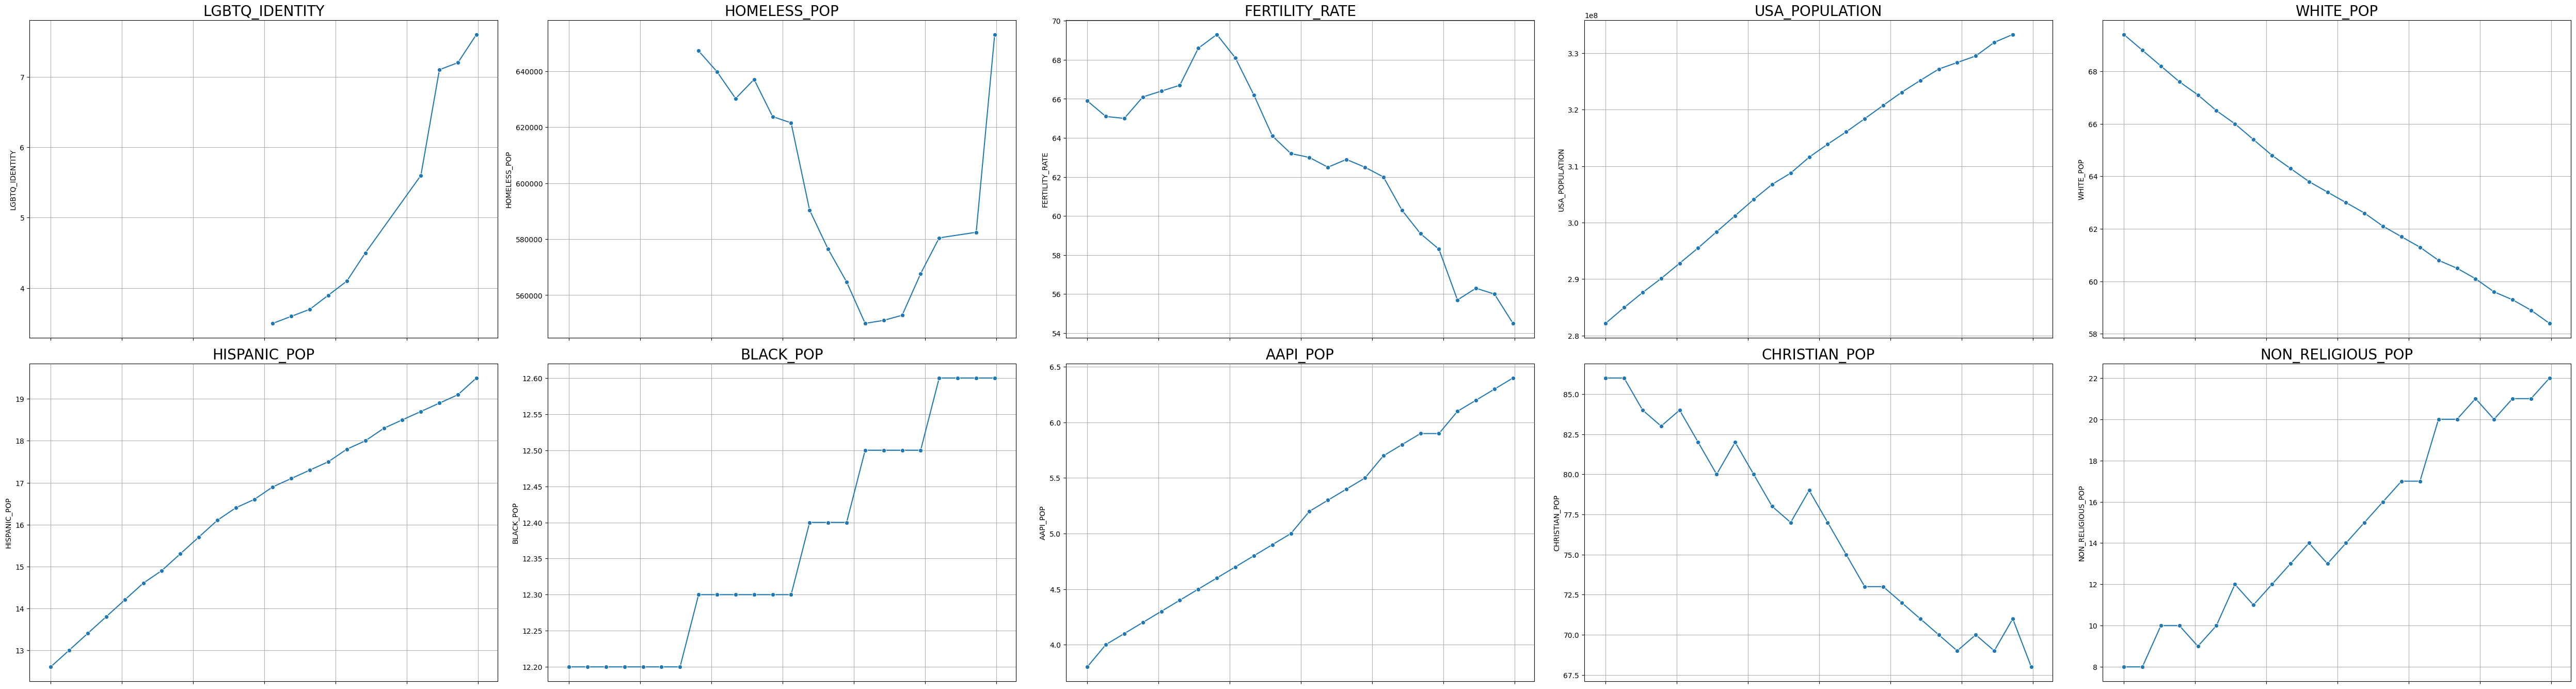

In [38]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 4*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 9: DEFENSE

In [39]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT9_DEFENSE', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  FOREIGN_AID  MIL_APPLICANTS  GLOBAL_INVOLVE_OPINION  \
0  Week-1-Jan-2000         30.3        365348.0                     NaN   
1  Week-2-Jan-2000          NaN             NaN                     NaN   
2  Week-3-Jan-2000          NaN             NaN                     NaN   
3  Week-4-Jan-2000          NaN             NaN                     NaN   
4  Week-1-Feb-2000          NaN             NaN                     NaN   

   MIL_DEATHS  
0       832.0  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [40]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  FOREIGN_AID  MIL_APPLICANTS  GLOBAL_INVOLVE_OPINION  MIL_DEATHS
0 2000-01-01         30.3        365348.0                     NaN       832.0
1 2000-01-02          NaN             NaN                     NaN         NaN
2 2000-01-03          NaN             NaN                     NaN         NaN
3 2000-01-04          NaN             NaN                     NaN         NaN
4 2000-02-01          NaN             NaN                     NaN         NaN


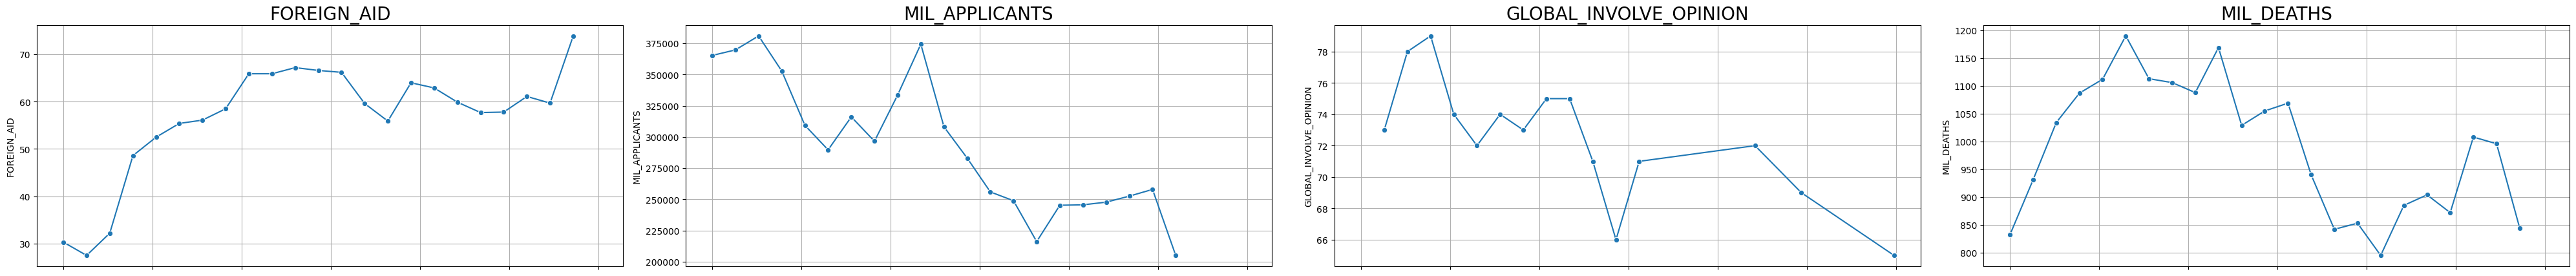

In [41]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 6*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 10: INFRASTRUCTURE

In [42]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT10_INFRASTRUCTURE', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  GOOD_BRIDGES  UNSATIS_ROADS
0  Week-1-Jan-2000           NaN          17.39
1  Week-2-Jan-2000           NaN            NaN
2  Week-3-Jan-2000           NaN            NaN
3  Week-4-Jan-2000           NaN            NaN
4  Week-1-Feb-2000           NaN            NaN


In [43]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  GOOD_BRIDGES  UNSATIS_ROADS
0 2000-01-01           NaN          17.39
1 2000-01-02           NaN            NaN
2 2000-01-03           NaN            NaN
3 2000-01-04           NaN            NaN
4 2000-02-01           NaN            NaN


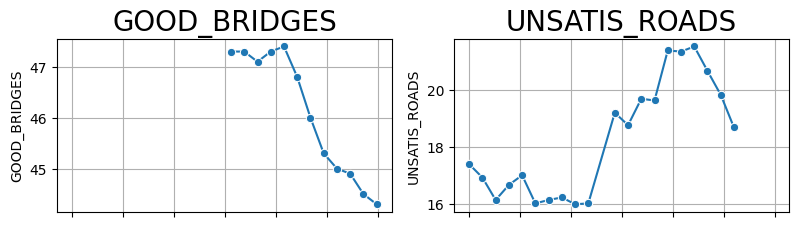

In [44]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 6*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 11: CRIME

In [45]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT11_CRIME', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  ACTIVE_SHOOTERS  BACKGROUND_CHECKS  FIREARM_PROD  \
0  Week-1-Jan-2000              0.0          8543037.0     3793541.0   
1  Week-2-Jan-2000              NaN                NaN           NaN   
2  Week-3-Jan-2000              NaN                NaN           NaN   
3  Week-4-Jan-2000              NaN                NaN           NaN   
4  Week-1-Feb-2000              NaN                NaN           NaN   

   DOM_VIOLENCE_RATE  INCARCERATED_POP  HOMICIDE_RATE  DOM_TERROR_INCIDENTS  \
0                NaN             494.0            5.9                   NaN   
1                NaN               NaN            NaN                   NaN   
2                NaN               NaN            NaN                   NaN   
3                NaN               NaN            NaN                   NaN   
4                NaN               NaN            NaN                   NaN   

   DOM_TERROR_DEFENDANTS  FBI_INVESTIGATIONS  FBI_DISRUPTIONS  \
0                    NaN   

In [46]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  ACTIVE_SHOOTERS  BACKGROUND_CHECKS  FIREARM_PROD  \
0 2000-01-01              0.0          8543037.0     3793541.0   
1 2000-01-02              NaN                NaN           NaN   
2 2000-01-03              NaN                NaN           NaN   
3 2000-01-04              NaN                NaN           NaN   
4 2000-02-01              NaN                NaN           NaN   

   DOM_VIOLENCE_RATE  INCARCERATED_POP  HOMICIDE_RATE  DOM_TERROR_INCIDENTS  \
0                NaN             494.0            5.9                   NaN   
1                NaN               NaN            NaN                   NaN   
2                NaN               NaN            NaN                   NaN   
3                NaN               NaN            NaN                   NaN   
4                NaN               NaN            NaN                   NaN   

   DOM_TERROR_DEFENDANTS  FBI_INVESTIGATIONS  FBI_DISRUPTIONS  \
0                    NaN                 NaN              NaN  

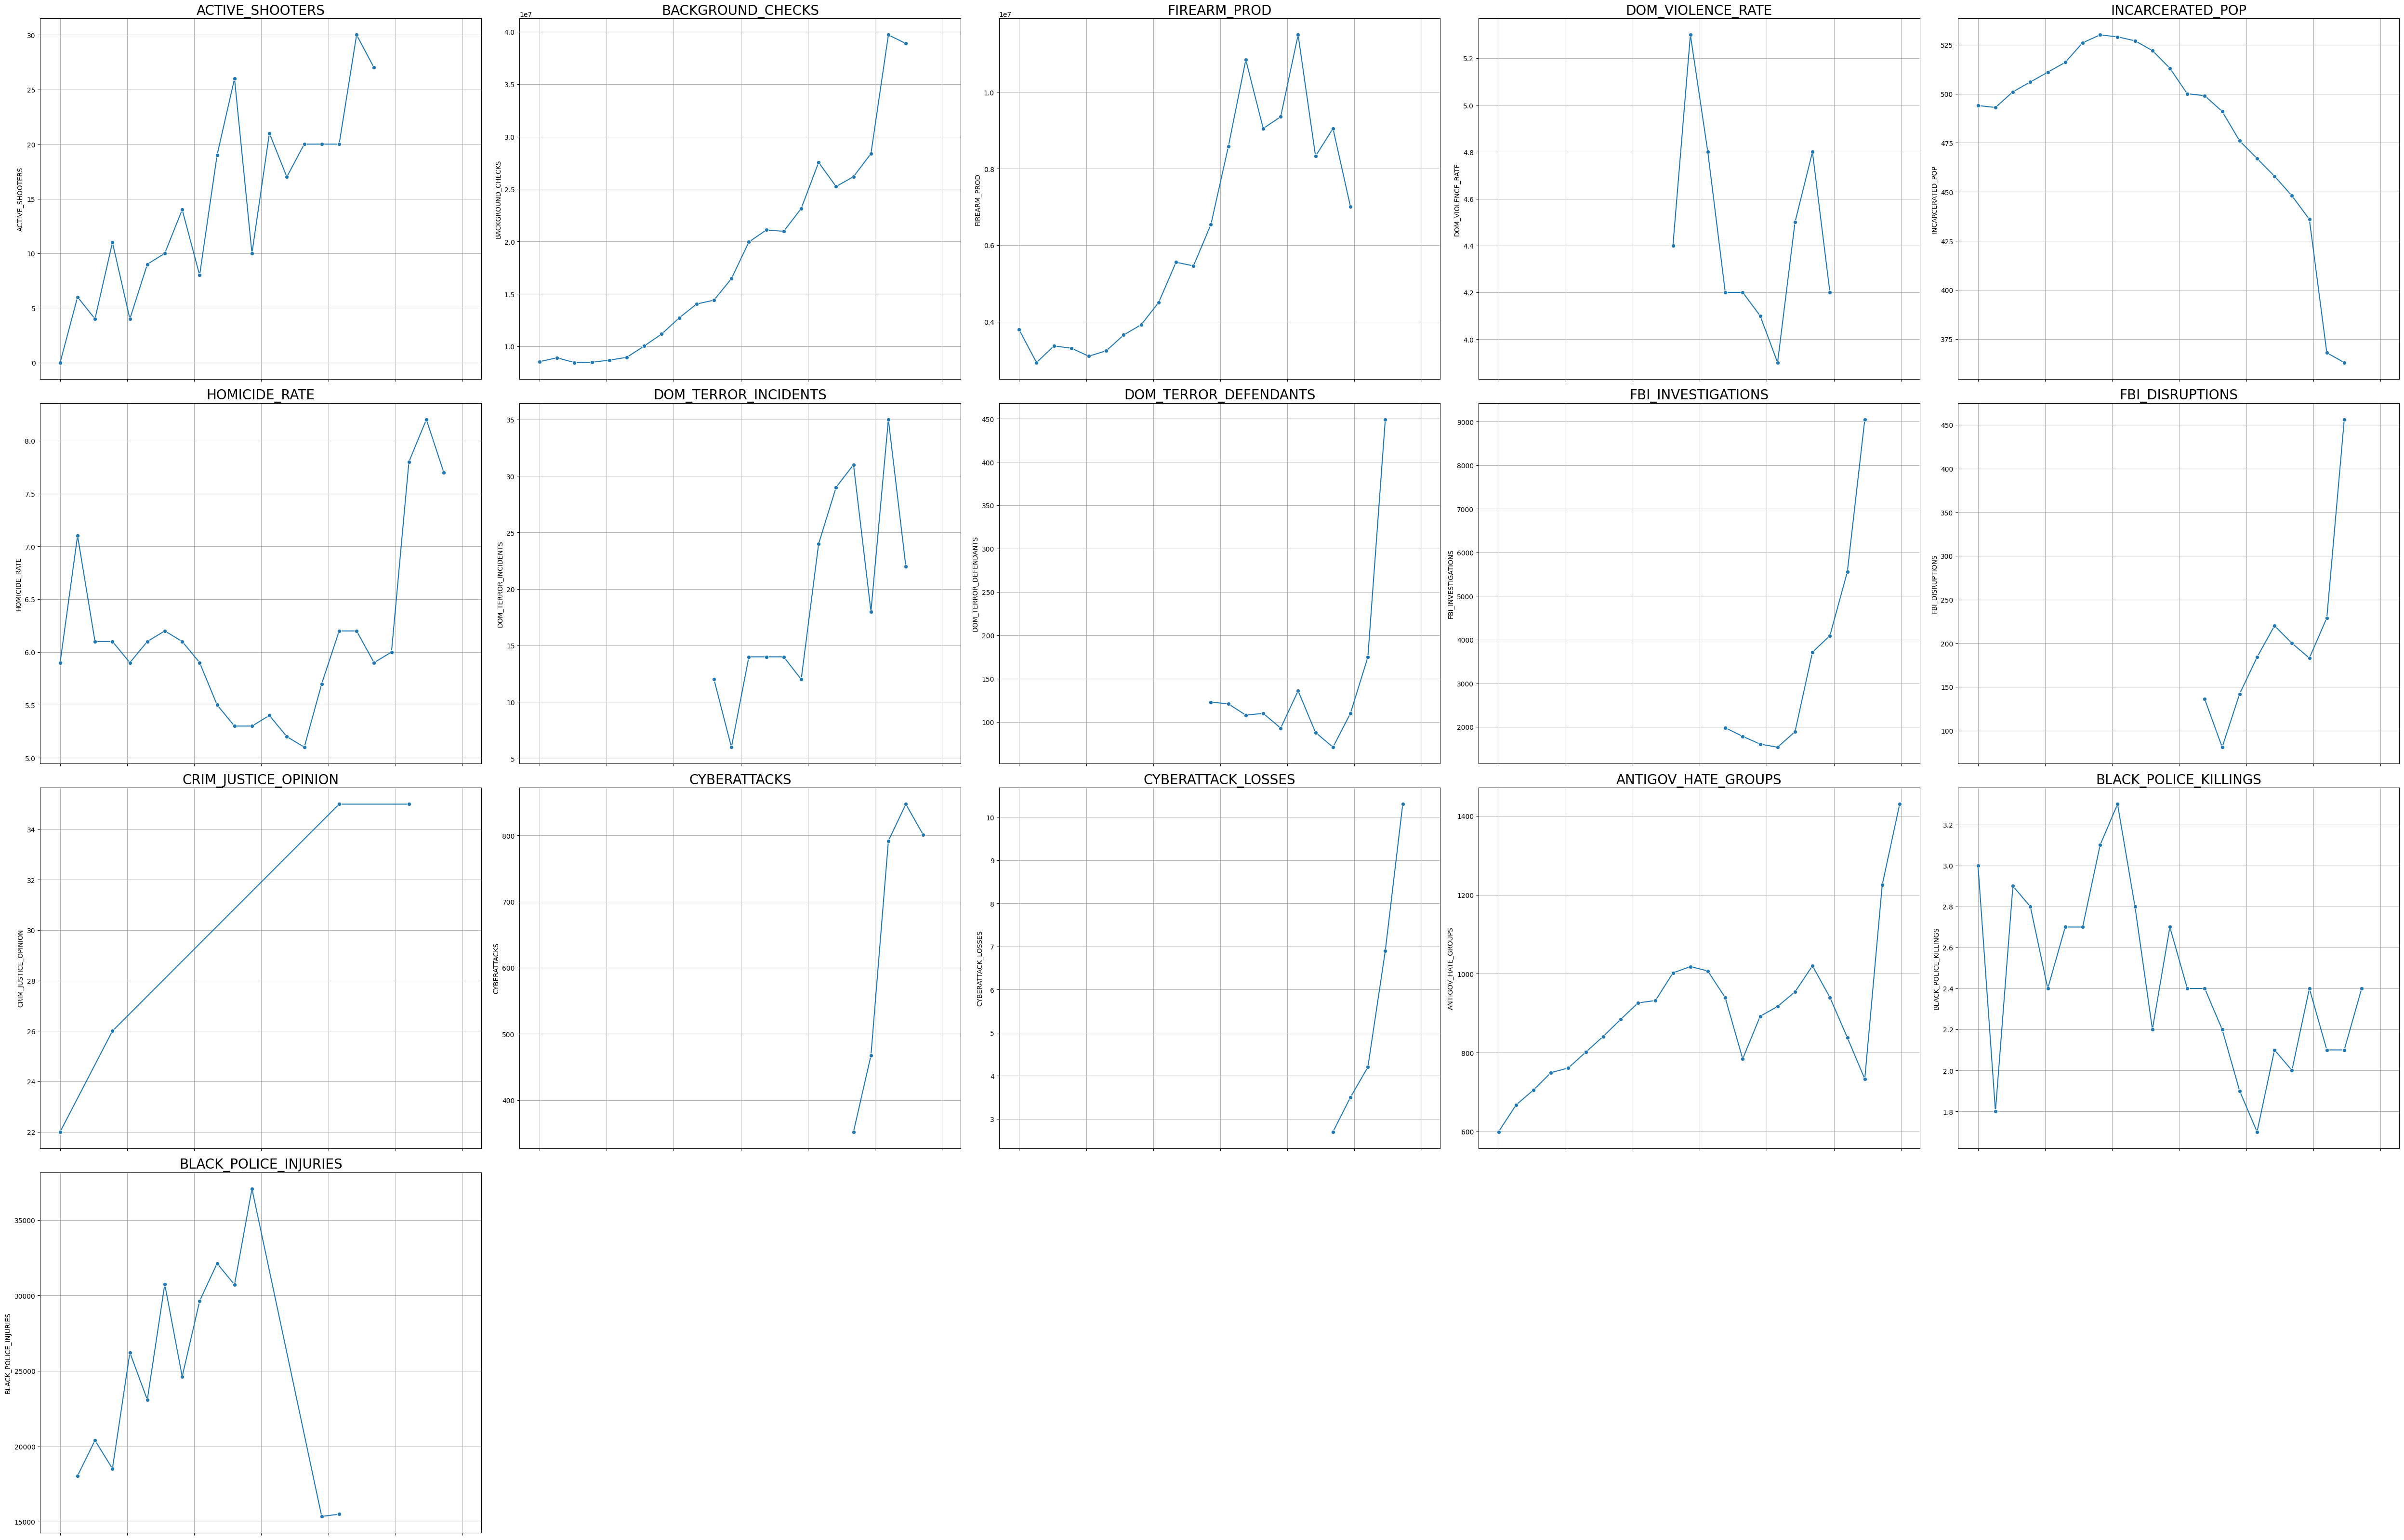

In [49]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(50, 3*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### CLIENT 12: AGRICULTURE

In [50]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='CLIENT12_AGRICULTURE', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  AGRI_SPENDING      FARMS  AGRI_SALES
0  Week-1-Jan-2000           2.08  2163739.6       322.2
1  Week-2-Jan-2000            NaN        NaN         NaN
2  Week-3-Jan-2000            NaN        NaN         NaN
3  Week-4-Jan-2000            NaN        NaN         NaN
4  Week-1-Feb-2000            NaN        NaN         NaN


In [51]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  AGRI_SPENDING      FARMS  AGRI_SALES
0 2000-01-01           2.08  2163739.6       322.2
1 2000-01-02            NaN        NaN         NaN
2 2000-01-03            NaN        NaN         NaN
3 2000-01-04            NaN        NaN         NaN
4 2000-02-01            NaN        NaN         NaN


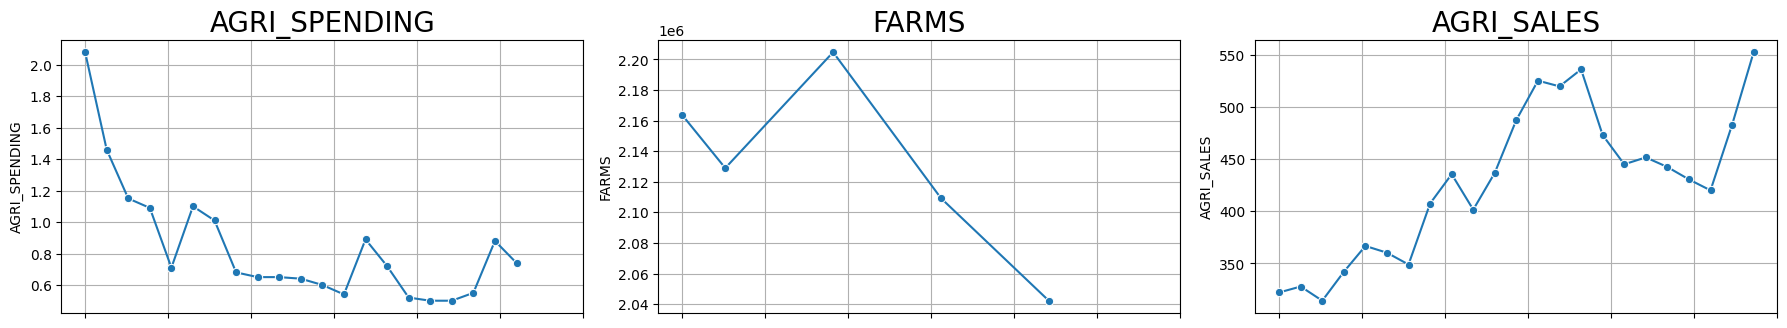

In [52]:
# Make multi-graph chart of time series variables
# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot each variable in a mini-plot
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(30, 6*len(df_numeric.columns)), sharex=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.lineplot(data=df_numeric, x=df_numeric.index, y=col, ax=axes[i], marker='o')
    axes[i].set_title(f"{col}", fontsize=20)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots (if num_vars is not a multiple of 5)
for i in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("DATE")
plt.tight_layout()
plt.show()

### GLOBAL OUTPUT

In [61]:
# Load the file from Google Drive
file_path = '/content/drive/My Drive/G720_Revised_Dataset.xlsx'

# Load specified sheet
df = pd.read_excel(file_path, sheet_name='GLOBAL', engine='openpyxl')

# Display the first few rows
print(df.head())

              DATE  GOVT_SATISFACTION
0  Week-1-Jan-2000               69.0
1  Week-2-Jan-2000                NaN
2  Week-3-Jan-2000                NaN
3  Week-4-Jan-2000                NaN
4  Week-1-Feb-2000                NaN


In [62]:
# Convert DATE column to datetime, ex: 2000-01-04 means Week 4 of January 2000, etc.
# Remove "Week-"
df['DATE'] = df['DATE'].str.replace('Week-', '', regex=False)

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')

# Display results
print(df.head())

        DATE  GOVT_SATISFACTION
0 2000-01-01               69.0
1 2000-01-02                NaN
2 2000-01-03                NaN
3 2000-01-04                NaN
4 2000-02-01                NaN


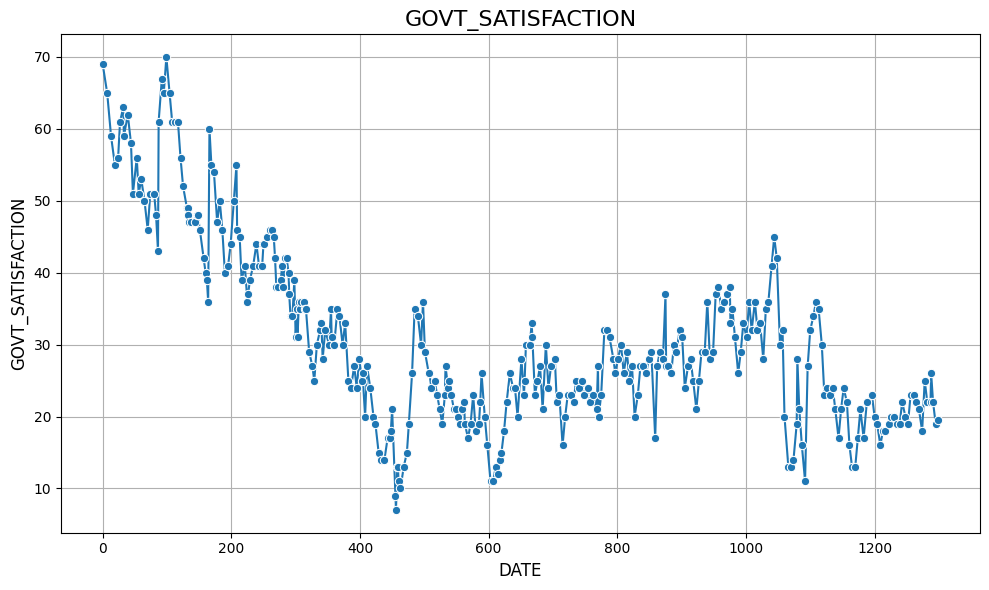

In [63]:
# Plot the global output 'GOVT_SATISFACTION' variable
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='GOVT_SATISFACTION', marker='o')

# Customize plot
plt.title('GOVT_SATISFACTION', fontsize=16)
plt.xlabel('DATE', fontsize=12)
plt.ylabel('GOVT_SATISFACTION', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [64]:
# End of code 2/23/25